In [49]:
import numpy as np
import pandas as pd
import csv
import numpy.ma as ma
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
from tensorflow.keras.layers import Lambda
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [50]:
pd.set_option("display.precision", 1)

In [91]:
item_train = pd.read_csv('train.csv')
item_train

,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,...,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,1.3,0.26
0,1,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
rating_df = pd.read_csv("rating.csv")
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [92]:
user_train=pd.read_csv("user_genre_avg_ratings_subset_no_header.csv")
user_train = np.nan_to_num(user_train, nan=0.0)
user_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [7.29032258, 7.53191489, 0.        , ..., 7.77777778, 7.58333333,
        8.        ],
       [4.7012987 , 5.18681319, 6.        , ..., 4.17073171, 4.34693878,
        7.28571429],
       ...,
       [7.92307692, 7.55555556, 0.        , ..., 8.5       , 9.33333333,
        9.5       ],
       [9.        , 8.25      , 0.        , ..., 9.5       , 9.33333333,
        9.66666667],
       [8.55555556, 8.66666667, 0.        , ..., 9.        , 8.25      ,
        0.        ]])

In [93]:
num_user_features = user_train.shape[1] 
num_item_features = item_train.shape[1]  
uvs = 3  # user genre vector start
ivs = 3  # item genre vector start
u_s = 1  # start of columns to use in training, user
i_s = 1  # start of columns to use in training, items
print(f"Number of training vectors: {len(item_train)}")
print(f"Number of training vectors: {len(user_train)}")

Number of training vectors: 12293
Number of training vectors: 9466


In [94]:
y_train=pd.read_csv("rating_only.csv")
y_train

,9.37
0,9.3
1,9.2
2,9.2
3,9.2
4,9.2
...,...
12058,4.2
12059,4.3
12060,4.9
12061,5.0


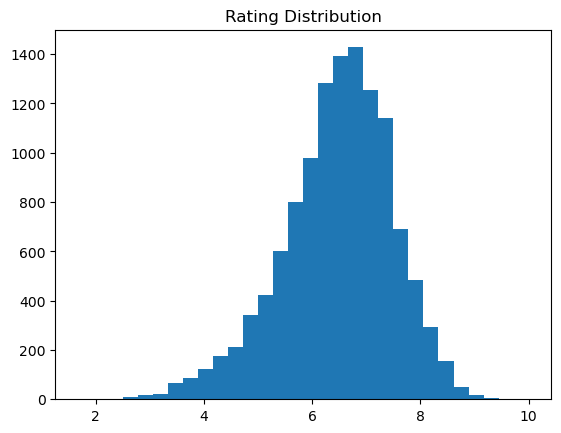

In [95]:
plt.hist(y_train, bins=30)
plt.title("Rating Distribution")
plt.show()

In [96]:
item_train_unscaled = item_train
user_train_unscaled = user_train

y_train_unscaled    = y_train

scalerItem = StandardScaler()
scalerItem.fit(item_train)
item_train = scalerItem.transform(item_train)


scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(np.array(y_train).reshape(-1, 1))
y_train = scalerTarget.transform(np.array(y_train).reshape(-1, 1))
#ynorm_test = scalerTarget.transform(y_test.reshape(-1, 1))


print(np.allclose(item_train_unscaled, scalerItem.inverse_transform(item_train)))
print(np.allclose(user_train_unscaled, scalerUser.inverse_transform(user_train)))

True
True


In [97]:
item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"movie/item training data shape: {item_train.shape}")

print(f"movie/item test data shape: {item_test.shape}")
print(f"user training data shape: {user_train.shape}")
print(f"user test data shape: {user_test.shape}")

movie/item training data shape: (9834, 31)
movie/item test data shape: (2459, 31)
user training data shape: (7572, 31)
user test data shape: (1894, 31)


In [98]:
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([     
         Dense(units=256,activation='relu'),
         Dense(units=128,activation='relu'),
         Dense(units=num_outputs,activation='linear')
    
])

item_NN = tf.keras.models.Sequential([    
        Dense(units=256,activation='relu'),
        Dense(units=128,activation='relu'),
        Dense(units=num_outputs,activation='linear')
  
  
])

input_user = tf.keras.layers.Input(shape=(num_user_features,))
vu = user_NN(input_user)
vu = Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vu)
input_item = tf.keras.layers.Input(shape=(num_item_features,))
vm = item_NN(input_item)
vm = Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm)

output = tf.keras.layers.Dot(axes=1)([vu, vm])


model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)   │ (None, 31)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_18 (InputLayer)   │ (None, 31)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_8 (Sequential)     │ (None, 32)                │          45,216 │ input_layer_16[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_9 (Sequential)     │ (None, 32)                │          45,216 │ input_layer_18[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda_8 (Lambda)             │ (None, 32)                │               0 │ sequential_8[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda_9 (Lambda)             │ (None, 32)                │               0 │ sequential_9[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot_4 (Dot)                   │ (None, 1)                 │               0 │ lambda_8[0][0],            │
│                               │                           │                 │ lambda_9[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 90,432 (353.25 KB)

 Trainable params: 90,432 (353.25 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [100]:
print("user_train shape:", user_train.shape)
print("item_train shape:", item_train.shape)
print("y_train shape:", y_train.shape)

user_train shape: (7572, 31)
item_train shape: (9834, 31)
y_train shape: (9650, 1)


In [101]:
min_samples = min(user_train.shape[0], item_train.shape[0], y_train.shape[0])

user_train = user_train[:min_samples]
item_train = item_train[:min_samples]
y_train = y_train[:min_samples]

print(user_train.shape, item_train.shape, y_train.shape)  

(7572, 31) (7572, 31) (7572, 1)


In [102]:
early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=5,             
    restore_best_weights=True
)

model.fit(
    [user_train, item_train],
    y_train,
    #validation_split=0.2,
    epochs=15,
    callbacks=[early_stop]
)

Epoch 1/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0723
Epoch 2/15
109/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0613

D:\anaconda\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0616
Epoch 3/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0606
Epoch 4/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0603
Epoch 5/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0602
Epoch 6/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0599
Epoch 7/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0596
Epoch 8/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0592
Epoch 9/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0591
Epoch 10/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0588
Epoch 11/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0582
Epoch 12/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0578
Epoch 13/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0574
Epoch 14/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0570
Epoch 15/15
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0562


In [103]:
min_samples = min(user_test.shape[0], item_test.shape[0], y_test.shape[0])

user_test = user_test[:min_samples]
item_test = item_test[:min_samples]
y_test = y_test[:min_samples]

print(user_test.shape, item_test.shape, y_test.shape)

(1894, 31) (1894, 31) (1894, 1)


In [104]:
model.evaluate([user_test, item_test], y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0689 


0.06733474135398865

In [105]:
def split_str(ifeatures, smax):
    ''' split the feature name strings to tables fit '''
    ofeatures = []
    for s in ifeatures:
        if not ' ' in s:  
            if len(s) > smax:
                mid = int(len(s)/2)
                s = s[:mid] + " " + s[mid:]
        ofeatures.append(s)
    return ofeatures

def gen_user_vecs(user_vec, num_items):
    """ given a user vector return:
        user predict maxtrix to match the size of item_vecs """
    user_vecs = np.tile(user_vec, (num_items, 1))
    return user_vecs

def predict_uservec(user_vecs, item_vecs, model, u_s, i_s, scaler):
    """ given a scaled user vector, does the prediction on all movies in scaled print_item_vecs returns
        an array predictions sorted by predicted rating,
        arrays of user and item, sorted by predicted rating sorting index
    """
    y_p = model.predict([user_vecs[:, u_s:], item_vecs[:, i_s:]])
    y_pu = scaler.inverse_transform(y_p)

    if np.any(y_pu < 0):
        print("Error, expected all positive predictions")
    sorted_index = np.argsort(-y_pu, axis=0).reshape(-1).tolist()  #negate to get largest rating first
    sorted_ypu   = y_pu[sorted_index]
    sorted_items = item_vecs[sorted_index]
    sorted_user  = user_vecs[sorted_index]
    return(sorted_index, sorted_ypu, sorted_items, sorted_user)
                
def get_user_vecs(user_id, user_train, item_vecs, user_to_genre):
    """ given a user_id, return:
        user train/predict matrix to match the size of item_vecs
        y vector with ratings for all rated movies and 0 for others of size item_vecs """

    if not user_id in user_to_genre:
        print("error: unknown user id")
        return None
    else:
        user_vec_found = False
        for i in range(len(user_train)):
            if user_train[i, 0] == user_id:
                user_vec = user_train[i]
                user_vec_found = True
                break
        if not user_vec_found:
            print("error in get_user_vecs, did not find uid in user_train")
        num_items = len(item_vecs)
        user_vecs = np.tile(user_vec, (num_items, 1))

        y = np.zeros(num_items)
        for i in range(num_items):  # walk through movies in item_vecs and get the movies, see if user has rated them
            movie_id = item_vecs[i, 0]
            if movie_id in user_to_genre[user_id]['movies']:
                rating = user_to_genre[user_id]['movies'][movie_id]
            else:
                rating = 0
            y[i] = rating
    return(user_vecs, y)


In [106]:
new_action = 10.0
new_adventure = 10.0
new_cars = 0.0
new_comedy = 0.0
new_demons = 0.0
new_drama = 0.0
new_ecchi = 0.0
new_fantasy = 0.0
new_game = 0.0
new_harem = 0.0
new_historical = 0.0
new_horror = 0.0
new_magic = 0.0
new_martial_arts = 0.0
new_mecha = 0.0
new_military = 0.0
new_mystery = 0.0
new_psychological = 0.0
new_romance = 0.0
new_samurai = 0.0
new_school = 0.0
new_scifi = 0.0
new_seinen = 0.0
new_shoujo = 0.0
new_shounen = 0.0
new_slice_of_life = 0.0
new_space = 0.0
new_sports = 0.0
new_super_power = 0.0
new_supernatural = 0.0
new_thriller = 0.0

user_vec = np.array([[new_action, new_adventure, new_cars, new_comedy,
                      new_demons, new_drama, new_ecchi, new_fantasy,
                      new_game, new_harem, new_historical, new_horror,
                      new_magic, new_martial_arts, new_mecha, new_military,
                      new_mystery, new_psychological, new_romance, new_samurai,
                      new_school, new_scifi, new_seinen, new_shoujo,
                      new_shounen, new_slice_of_life, new_space, new_sports,
                      new_super_power, new_supernatural, new_thriller]])


In [107]:
df = pd.read_csv("anime_id_name_genre.csv", encoding='latin1')

# Generate the dictionary
anime_dict = {
    row['anime_id']: {'name': row['name'], 'genre': row['genre']}
    for _, row in df.iterrows()
}

# Print sample entries
for k in list(anime_dict)[:5]:
    print(k, anime_dict[k])


32281 {'name': 'Kimi no Na wa.', 'genre': 'Drama, Romance, School, Supernatural'}
5114 {'name': 'Fullmetal Alchemist: Brotherhood', 'genre': 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'}
28977 {'name': 'Gintama°', 'genre': 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen'}
9253 {'name': 'Steins;Gate', 'genre': 'Sci-Fi, Thriller'}
9969 {'name': 'Gintama&#039;', 'genre': 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen'}


In [108]:
def print_pred_anime(y_p, item, anime_dict, maxcount=10):
    """Improved recommendation printer with genre match scoring and score boosting."""

    preferred_genres = {"Action", "Adventure"}
    disp = [["final_score", "y_p", "genre_match", "anime_id", "name", "genres"]]
    scored_items = []

    for i in range(0, y_p.shape[0]):
        anime_id = int(item.iloc[i, 0])
        entry = anime_dict.get(anime_id)

        if not entry:
            continue

        genres_str = entry.get("genre", "")
        if not isinstance(genres_str, str):
            continue  # skip if genre is NaN or not a string

        # Genre match score calculation
        anime_genres = set(map(str.strip, genres_str.split(',')))
        match_score = len(preferred_genres & anime_genres) / len(preferred_genres)

        raw_score = float(y_p[i, 0])
        boosted = raw_score + 0.2 if match_score == 1.0 else raw_score
        final_score = 0.7 * boosted + 0.3 * match_score * 10

        scored_items.append((
            round(final_score, 2),
            round(raw_score, 1),
            round(match_score, 2),
            anime_id,
            entry.get("name", "Unknown"),
            genres_str
        ))

    # Sort by final score descending
    scored_items = sorted(scored_items, key=lambda x: -x[0])

    for row in scored_items[:maxcount]:
        disp.append(row)

    return tabulate.tabulate(disp, tablefmt='html', headers="firstrow")



In [109]:
new_sh=pd.read_csv("anime_id_name_genre.csv", encoding='latin1')

In [110]:
item_vecs=pd.read_csv('train.csv')
user_vecs = gen_user_vecs(user_vec,len(item_vecs))

suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs) 
#print(suser_vecs)
#print(sitem_vecs)
y_p = model.predict([suser_vecs, sitem_vecs])


y_pu = scalerTarget.inverse_transform(y_p)
#print(y_p)
#print(y_pu)
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  
sorted_ypu   = y_pu[sorted_index]
sorted_items = new_sh.iloc[sorted_index]
print(sorted_ypu) 

print_pred_anime(sorted_ypu, sorted_items, anime_dict, maxcount=25 )

385/385 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
[[8.171991 ]
 [8.163665 ]
 [8.156138 ]
 ...
 [3.9774487]
 [3.9602861]
 [3.799674 ]]


final_score,y_p,genre_match,anime_id,name,genres
8.77,8,1,20141,Lupin III: Princess of the Breeze - Kakusareta Kuuchuu Toshi,"Action, Adventure, Comedy, Shounen"
8.62,7.8,1,12231,Dragon Ball: Episode of Bardock,"Action, Adventure, Comedy, Fantasy, Martial Arts, Sci-Fi, Shounen, Super Power"
8.5,7.7,1,32108,Digimon Adventure tri. 2: Ketsui,"Action, Adventure, Comedy, Drama"
8.48,7.6,1,4067,Shin Megami Tensei Devil Children,"Action, Adventure, Demons, Fantasy, Game, Kids, Magic, Sci-Fi, Supernatural"
8.46,7.6,1,131,Saiyuuki Reload Gunlock,"Action, Adventure, Comedy, Fantasy, Shoujo"
8.43,7.6,1,944,The Third: Aoi Hitomi no Shoujo,"Action, Adventure, Sci-Fi, Seinen"
8.37,7.5,1,2123,Digimon X-Evolution,"Action, Adventure, Fantasy, Sci-Fi"
8.36,7.5,1,154,Shaman King,"Action, Adventure, Comedy, Drama, Shounen, Supernatural"
8.34,7.4,1,32051,One Piece: Adventure of Nebulandia,"Action, Adventure, Comedy, Fantasy, Shounen, Super Power"
8.26,7.3,1,1195,Zero no Tsukaima,"Action, Adventure, Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School"
